In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [118]:
data=pd.read_csv('/Users/anuraag/Python/Cardio ML/cardio_train.csv',sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [115]:
data1=pd.read_csv('/Users/anuraag/Python/Cardio ML/cardio_train.csv',sep=';')



In [87]:
data.info()
# Age | Objective Feature | age | int (days)
# Height | Objective Feature | height | int (cm) |
# Weight | Objective Feature | weight | float (kg) |
# Gender | Objective Feature | gender | categorical code |
# Systolic blood pressure | Examination Feature | ap_hi | int |
# Diastolic blood pressure | Examination Feature | ap_lo | int |
# Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
# Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
# Smoking | Subjective Feature | smoke | binary |
# Alcohol intake | Subjective Feature | alco | binary |
# Physical activity | Subjective Feature | active | binary |
# Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


<class 'pandas.core.frame.DataFrame'>
Index: 68963 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68963 non-null  int64  
 1   age          68963 non-null  int64  
 2   gender       68963 non-null  int64  
 3   height       68963 non-null  int64  
 4   weight       68963 non-null  float64
 5   ap_hi        68963 non-null  int64  
 6   ap_lo        68963 non-null  int64  
 7   cholesterol  68963 non-null  int64  
 8   gluc         68963 non-null  int64  
 9   smoke        68963 non-null  int64  
 10  alco         68963 non-null  int64  
 11  active       68963 non-null  int64  
 12  cardio       68963 non-null  int64  
 13  bmi          68963 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.9 MB


In [119]:
data.age=data.age/365
data.age=data.age.round(0).astype(int)

In [120]:
data.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
min(data.ap_hi),max(data.ap_hi)

(7, 240)

In [121]:
data['bmi']=data.weight/((data.height/100)**2)

In [122]:
data = data[(data.ap_lo > 0) & (data.ap_lo <= 150)]


In [123]:
data = data[(data.ap_hi > 0) & (data.ap_hi <= 250)]

In [124]:
data['cardio'].value_counts()

cardio
0    34841
1    34122
Name: count, dtype: int64

# ******Exploratory Data Analysis******

## *****Univariate Analysis*****

### ***Numerical***

## AGE

<Axes: xlabel='age', ylabel='Count'>

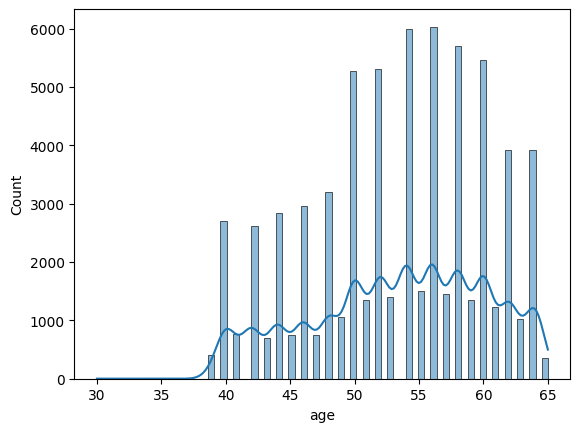

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='age',kde=True)
plt.title('Age Distribution of Patients', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

#### Age is comparatively normally distributed after 40s but there is a slight skewness towards the right side


## HEIGHT

<Axes: xlabel='height', ylabel='Count'>

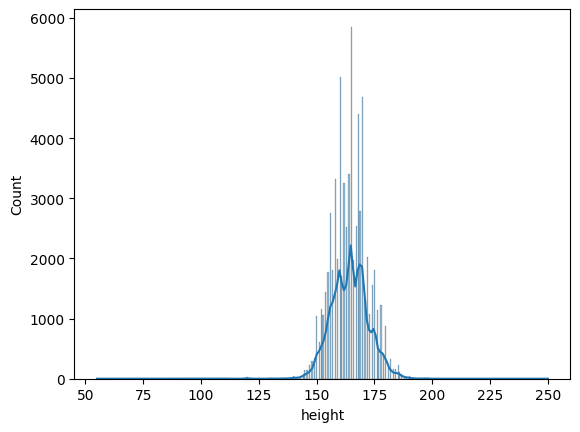

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='height',kde=True)
plt.title('Height Distribution of Patients', fontsize=14, fontweight='bold')
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

#### Height parameter is normally distributed but have long tails indicating wide range of values and potentially outliers

## WEIGHT

<Axes: xlabel='weight', ylabel='Count'>

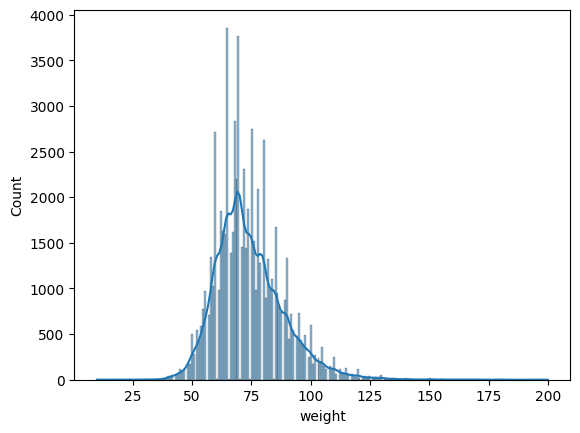

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='weight',kde=True)
plt.title('Weight Distribution of Patients', fontsize=14, fontweight='bold')
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

#### Similar to height it is normally distributed but the it has a long right tail which makes them potenially outliers

### AP_LOW and AP_HIGH

The higher and negative values are removed which are not possible or does not make sense 

<Axes: xlabel='ap_lo'>

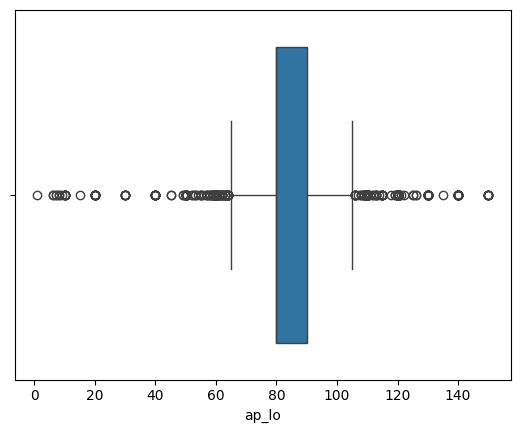

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ap_lo')
plt.title('Diastolic Blood Pressure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diastolic Blood Pressure (mmHg)', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

The points at 0-40 are error values and the values later 130 are not normal and can surely be the reading of the positively diagonised one (Not all but most)

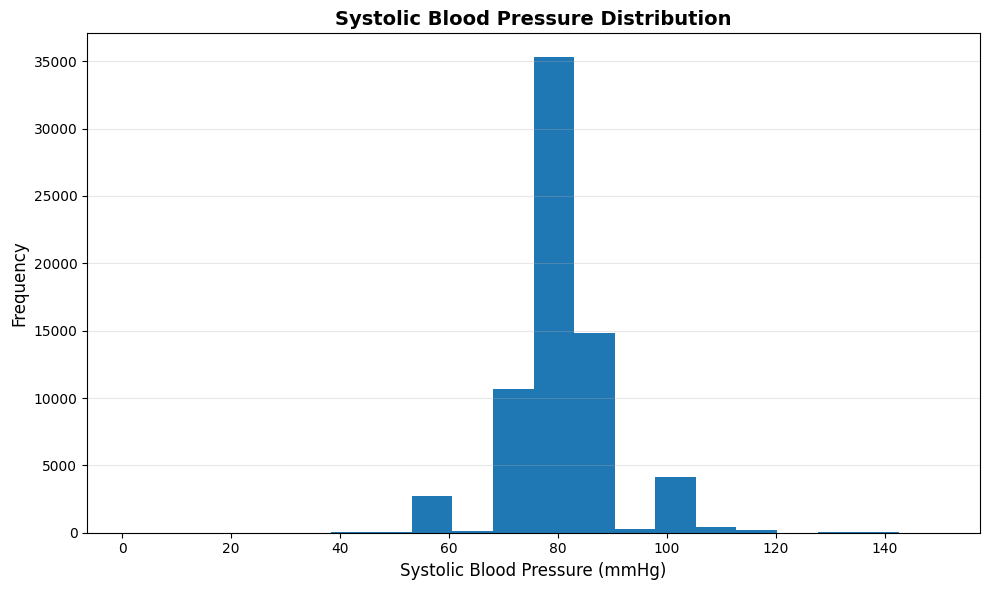

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data=data,x='ap_lo',bins=20)
plt.title('Systolic Blood Pressure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Systolic Blood Pressure (mmHg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

It is normally distributed values from 70 to 120 are regular values

<Axes: xlabel='ap_hi'>

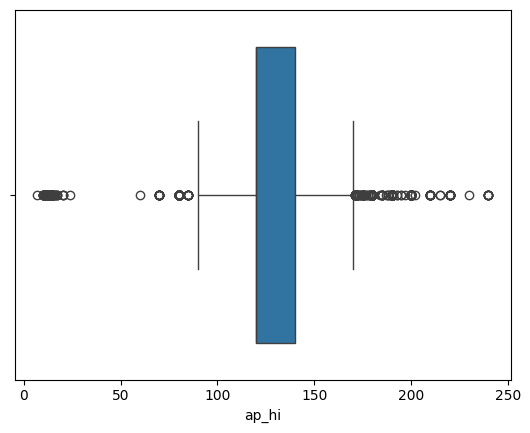

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ap_hi')
plt.title('Systolic Blood Pressure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Systolic Blood Pressure (mmHg)', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

The points at 0-60 are error values and the values later 220 are not normal and can surely be the reading of the positively diagonised one (Not all but most)

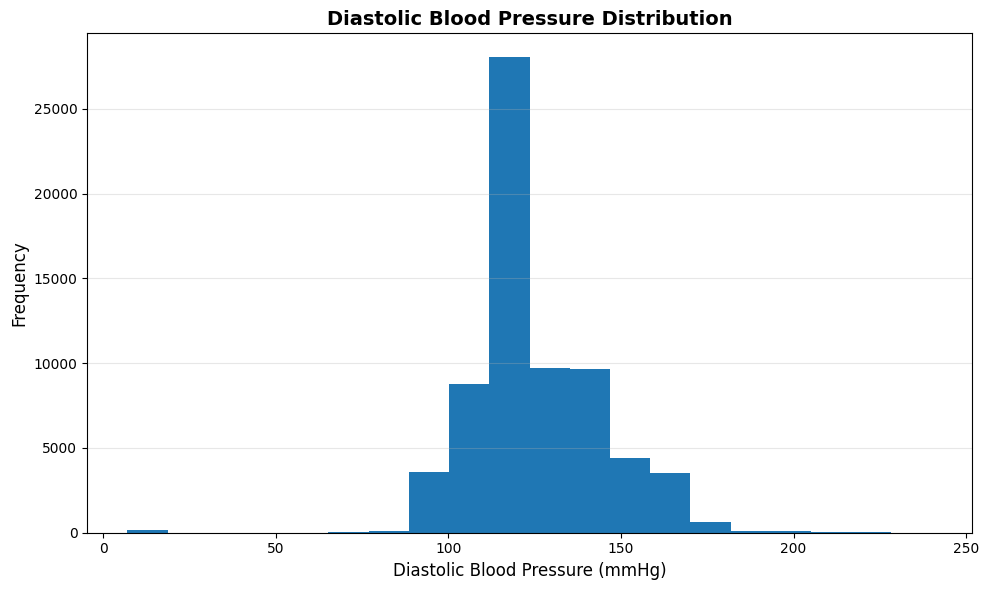

In [90]:
plt.figure(figsize=(10,6))
plt.hist(data=data,x='ap_hi',bins=20)
plt.title('Diastolic Blood Pressure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diastolic Blood Pressure (mmHg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

It is normally distributed values from 80 to 180 are regular values

### ***Categorical***

### Gender

/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/3789510548.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['women','men'])


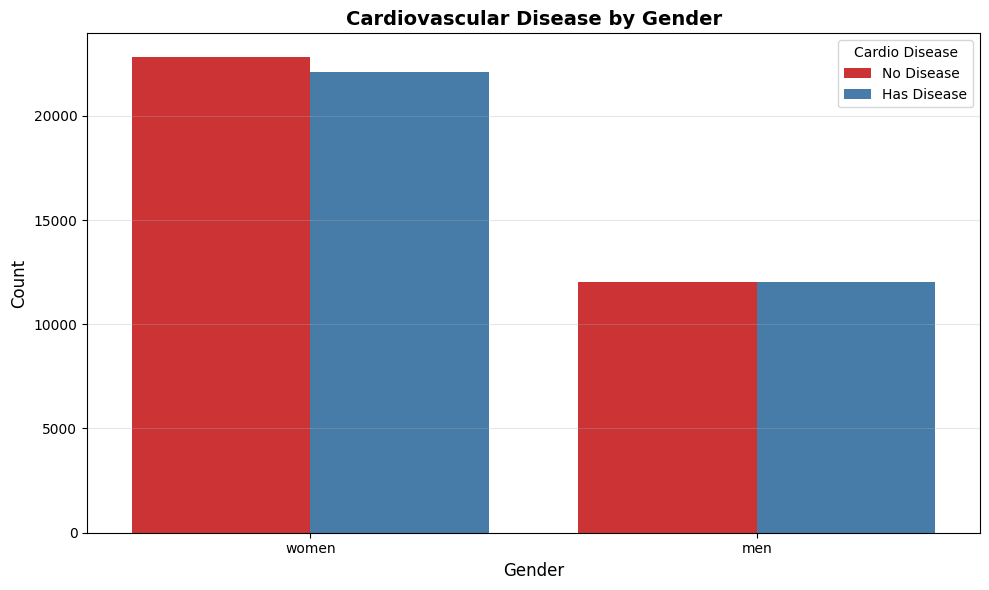

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='cardio',data=data,palette='Set1')
plt.gca().set_xticklabels(['women','men'])
plt.title('Cardiovascular Disease by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cardio Disease', labels=['No Disease', 'Has Disease'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

#### There are more women than men who are diagnosed with cardio disease

### Cholesterol

/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/393362706.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['normal','high','very high'])


[Text(0, 0, 'normal'), Text(1, 0, 'high'), Text(2, 0, 'very high')]

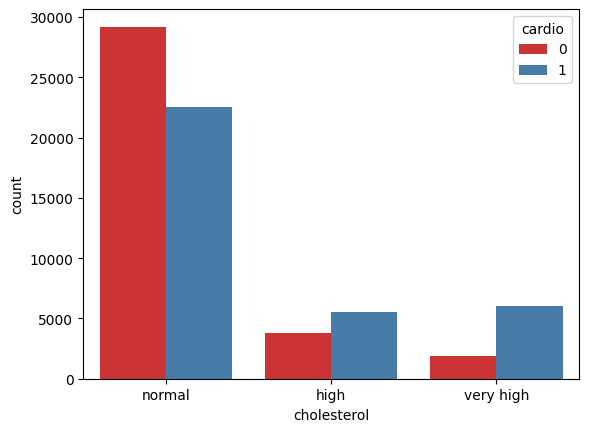

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='cholesterol',hue='cardio',data=data,palette='Set1')
plt.gca().set_xticklabels(['normal','high','very high'])
plt.title('Cholesterol Levels vs Cardiovascular Disease', fontsize=14, fontweight='bold')
plt.xlabel('Cholesterol Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cardio Disease', labels=['No Disease', 'Has Disease'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

#### People with above normal and well above normal cholesterol are at a high risk of a heart disease 

### Glucose

/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/3362644839.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['normal','high','very high'])


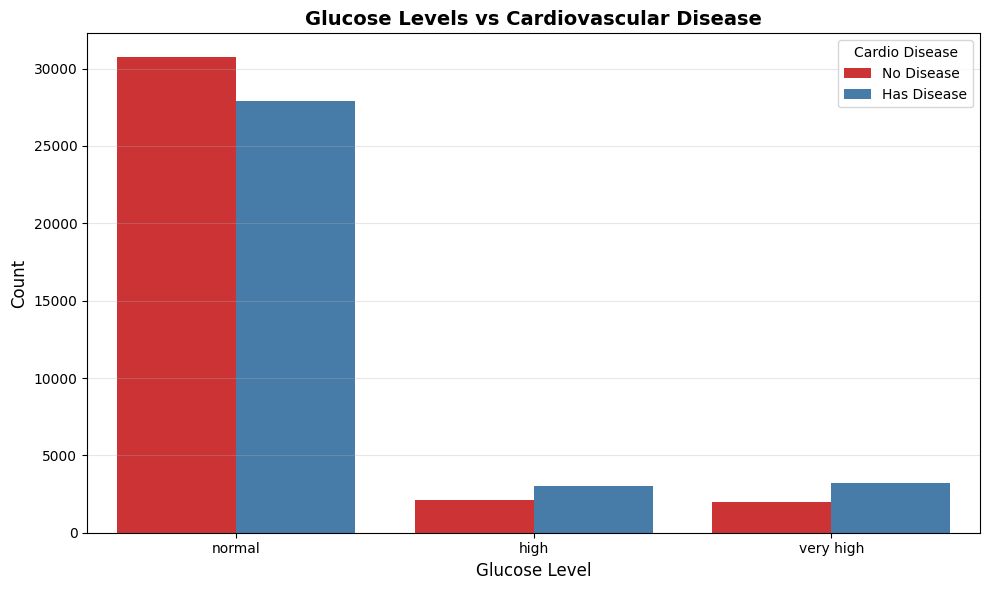

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x='gluc',hue='cardio',data=data,palette='Set1')
plt.gca().set_xticklabels(['normal','high','very high'])
plt.title('Glucose Levels vs Cardiovascular Disease', fontsize=14, fontweight='bold')
plt.xlabel('Glucose Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cardio Disease', labels=['No Disease', 'Has Disease'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

#### People with above normal and high glucose levels have a higher chance of having the disease

### Smoking

/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/1058182336.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['no','yes'])


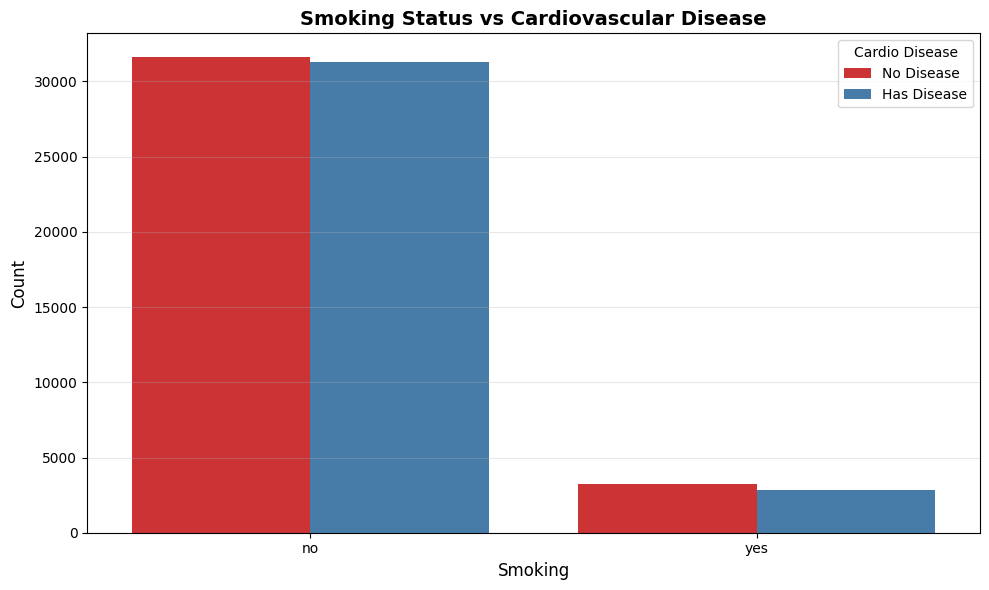

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='smoke',hue='cardio',data=data,palette='Set1')
plt.gca().set_xticklabels(['no','yes'])
plt.title('Smoking Status vs Cardiovascular Disease', fontsize=14, fontweight='bold')
plt.xlabel('Smoking', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cardio Disease', labels=['No Disease', 'Has Disease'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

##### Smoking is a contributing risk factor for cardiovascular disease, though its association appears weaker compared to factors like cholesterol and glucose

### Alcohol

/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/2957313365.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['no','yes'])


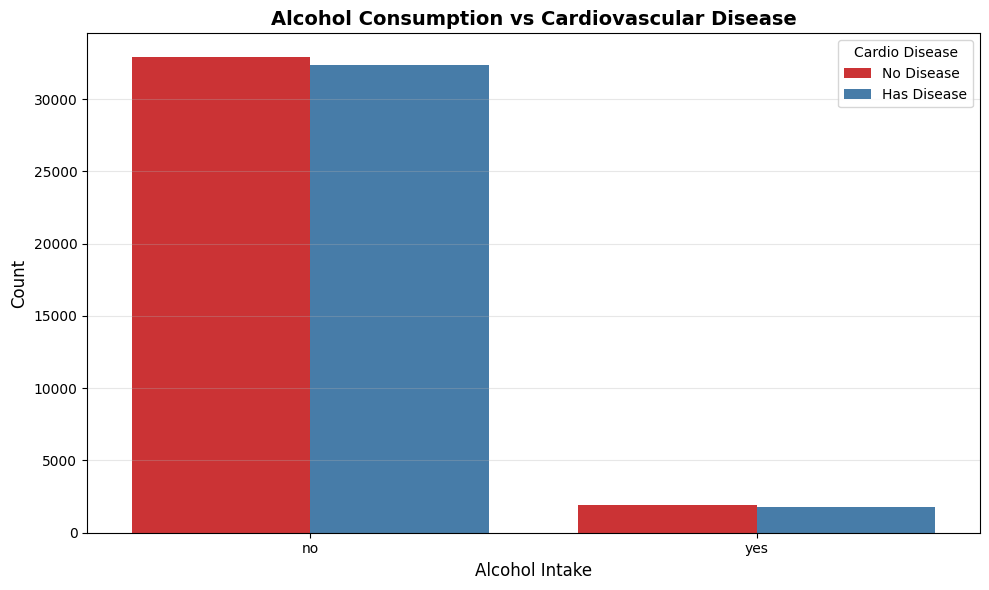

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x='alco',hue='cardio',data=data,palette='Set1')
plt.gca().set_xticklabels(['no','yes'])
plt.title('Alcohol Consumption vs Cardiovascular Disease', fontsize=14, fontweight='bold')
plt.xlabel('Alcohol Intake', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cardio Disease', labels=['No Disease', 'Has Disease'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

##### Alcohol consumption shows a similar pattern to smoking as a contributing risk factor, though not as strong as physiological markers

/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/1366850571.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['no','yes'])


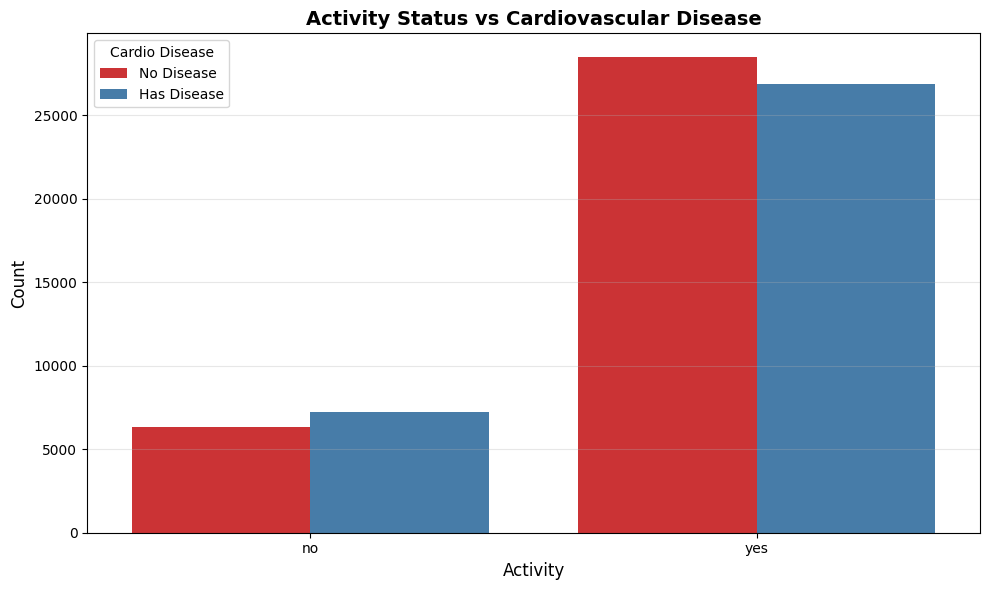

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x='active',hue='cardio',data=data,palette='Set1')
plt.gca().set_xticklabels(['no','yes'])
plt.title('Activity Status vs Cardiovascular Disease', fontsize=14, fontweight='bold')
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cardio Disease', labels=['No Disease', 'Has Disease'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

##### Physical activity shows an association with cardiovascular disease. Lack of activity may indirectly impact cholesterol levels and other metabolic factors that are major contributors to heart disease

In [125]:
data['cholesterol']=data['cholesterol'].replace([1,2,3],['normal','high','very high'])

In [126]:
data['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)


/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/2669354509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)


## *****Bivariate Analysis*****

In [94]:
cardio_yes=data[data.cardio==1]

In [133]:
cardio_yes['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)


/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/3767043875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cardio_yes['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)
/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/3767043875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_yes['gender']

In [136]:
cardio_yes['cholesterol']=cardio_yes['cholesterol'].replace([1,2,3],['normal','high','very high'])

/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/3335530290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_yes['cholesterol']=cardio_yes['cholesterol'].replace([1,2,3],['normal','high','very high'])


<Axes: xlabel='cholesterol', ylabel='count'>

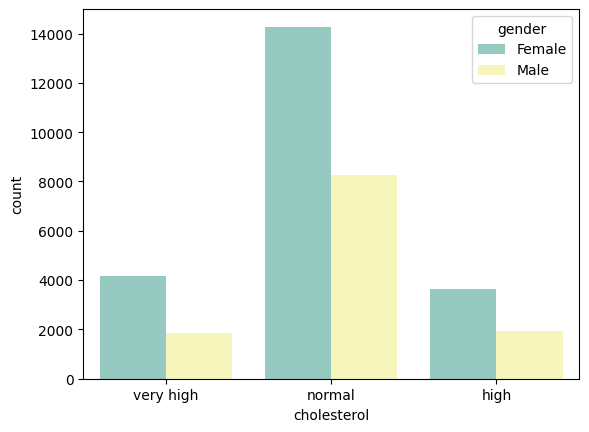

In [137]:
sns.countplot(x='cholesterol',hue='gender',data=cardio_yes,palette='Set3')

##### Among patients diagnosed with CVD, a significant portion have normal cholesterol levels. Women represent the majority of diagnosed cases in this dataset

/var/folders/9b/1hlpb3rd7p504l6bjh0pshmr0000gn/T/ipykernel_70335/2156326994.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cholesterol',y='cardio',data=data,palette='Set3')


<Axes: xlabel='cholesterol', ylabel='cardio'>

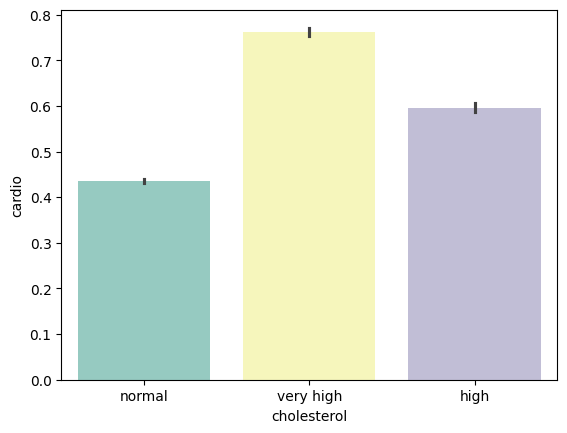

In [138]:
sns.barplot(x='cholesterol',y='cardio',data=data,palette='Set3')

##### The likelihood of cardiovascular disease increases significantly with cholesterol levels, with the highest probability observed in individuals with very high cholesterol

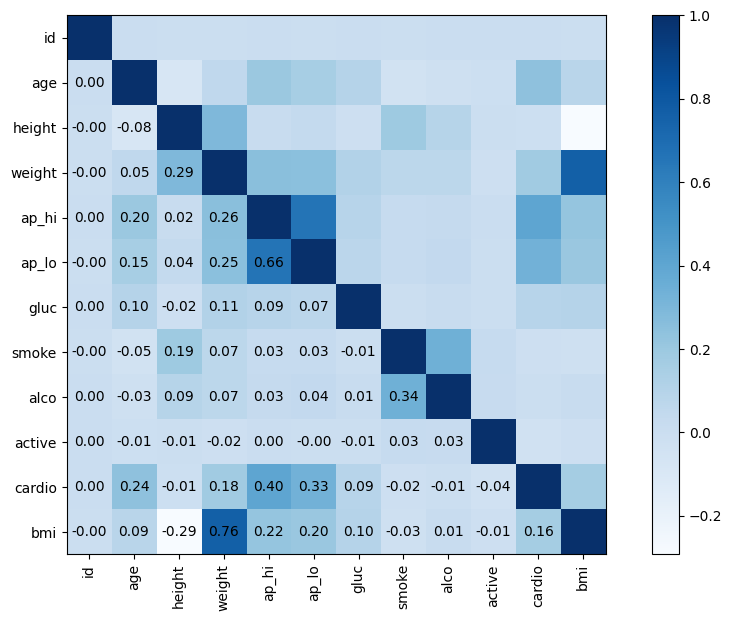

In [146]:
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 7))
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

<Axes: xlabel='ap_lo', ylabel='ap_hi'>

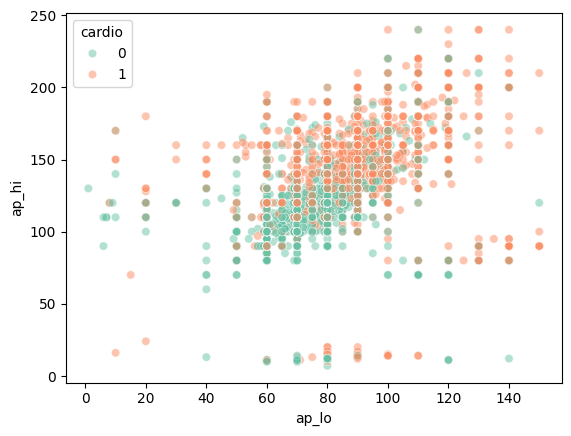

In [153]:
sns.scatterplot(x='ap_lo',y='ap_hi',data=data,hue='cardio',palette='Set2',alpha=0.5)

##### The scatter plot reveals that patients with diastolic pressure (60-80 mmHg) and systolic pressure (80-120 mmHg) predominantly do not have CVD. However, as blood pressure values increase beyond these normal ranges, the proportion of CVD cases increases significantly